# 2023-03-07

## regex module (3/6 수업 이어서)

In [27]:
import re

### re.findall()
 - 정규식과 매치되는 text return
 - \d : 모든 숫자
 - \s : 공백
 - \w : 숫자 + 문자
 - \D : 숫자를 제외한 모든 문자

In [7]:
text = '123123123하하하123123!!!'

print(re.findall('\d', text))
print(re.findall('\D', text))

['1', '2', '3', '1', '2', '3', '1', '2', '3', '1', '2', '3', '1', '2', '3']
['하', '하', '하', '!', '!', '!']


In [11]:
# 전화번호만 추출하고 싶을 때

text = '010-1234-5678김종현'

re.findall('\d+-\d+-\d+', text)

['010-1234-5678']

### re.sub()
 - 일치하는 것을 찾아서 바꾼다.
 - 특수 문자를 제거 -> 특수문자를 공백, 띄어쓰기로 변경

In [13]:
text = '010-1234-5678김종현'

re.sub('\d{3}-\d{3,4}-\d{3,4}', '<phone_num>', text)

'<phone_num>김종현'

In [15]:
text = '그는 말했다, "나는 할 수 있어!"라고'

re.sub('[^가-힣 ]', '', text)

'그는 말했다 나는 할 수 있어라고'

### [실습]

In [114]:
text = """0 Choi JinYeong
1 Park JiSung
2 Park ChanHo"""
text

'0 Choi JinYeong\n1 Park JiSung\n2 Park ChanHo'

In [118]:
# 예제1. 공백을 모두 찾아 split
# 출력결과 : ['0', 'Choi', 'JinYeong', '1', 'Park', 'JiSung', '2', 'Park', 'ChanHo']

re.split('\s+', text)         # 공백이 최소 하나이상인 경우 공백을 날림

['0', 'Choi', 'JinYeong', '1', 'Park', 'JiSung', '2', 'Park', 'ChanHo']

In [19]:
# 예제2. 숫자인 데이터만 찾기

re.findall('\d', text)

['0', '1', '2']

In [38]:
# 예제3. 대문자 데이터 찾기

re.findall('[A-Z]', text)

['C', 'J', 'Y', 'P', 'J', 'S', 'P', 'C', 'H']

In [126]:
# 예제4. 영어로만 이루어진 데이터 찾기

re.findall('[A-Z][a-z]+', text)      # 대문자를 먼저 찾고 소문자는 끝까지를

['Choi', 'Jin', 'Yeong', 'Park', 'Ji', 'Sung', 'Park', 'Chan', 'Ho']

### 정규식 활용 토큰화

In [129]:
from nltk.tokenize import RegexpTokenizer

text = 'No great man ever complains of want of opportunity.'

tokenizer1 = RegexpTokenizer('[\w]+')             # \w : 문자 또는 숫자, + : 하나 이상
tokenizer2 = RegexpTokenizer('\s+', gaps = True)  # \s : 공백이 하나라도 있으면 그 공백 기준(gaps=True)으로 데이터를 tokenize
tokenizer3 = RegexpTokenizer('\s+')               # 공백기준

print(tokenizer1.tokenize(text))
print(tokenizer2.tokenize(text))                 # 공백기준이므로 마지막 마침표가 붙은 것을 확인할 수 있다.
print(tokenizer3.tokenize(text))

['No', 'great', 'man', 'ever', 'complains', 'of', 'want', 'of', 'opportunity']
['No', 'great', 'man', 'ever', 'complains', 'of', 'want', 'of', 'opportunity.']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


# Word Embedding

## Tensorflow(one-hot encoding -> Embedding)

In [142]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

# tokenizing
corpus = ['우리말은 우리 생활과 문화와 역사와 정신과 모든 것을 담고 있는 우리 삶의 기본이다. 우리말은 우리 삶 그 자체다.']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
print('----------------------tokenizing---------------------')
print(tokenizer.word_index)            # 글자의 index
print(tokenizer.word_counts)           # 글자의 빈도 수

# 정수화
integers = tokenizer.texts_to_sequences(corpus) 
print('------------------------to integers-------------------')
print(integers)    # row의 갯수

# Vector화

# 1. one-hot vector화
n = len(tokenizer.word_index) + 1
onehot_encoding = to_categorical(integers, num_classes = n)
print('----------------------one-hot vectors------------------')
print(onehot_encoding)

# 2. embedding vector
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
model = Sequential()
model.add(Embedding(input_dim = n, output_dim = 3))       # n개를 넣고 3개의 차원으로 임베딩
model.compile(optimizer = 'rmsprop', loss = 'mse')
embedding = model.predict(integers)
print(embedding.shape)    # row의 갯수

----------------------tokenizing---------------------
{'우리': 1, '우리말은': 2, '생활과': 3, '문화와': 4, '역사와': 5, '정신과': 6, '모든': 7, '것을': 8, '담고': 9, '있는': 10, '삶의': 11, '기본이다': 12, '삶': 13, '그': 14, '자체다': 15}
OrderedDict([('우리말은', 2), ('우리', 3), ('생활과', 1), ('문화와', 1), ('역사와', 1), ('정신과', 1), ('모든', 1), ('것을', 1), ('담고', 1), ('있는', 1), ('삶의', 1), ('기본이다', 1), ('삶', 1), ('그', 1), ('자체다', 1)])
------------------------to integers-------------------
[[2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 1, 11, 12, 2, 1, 13, 14, 15]]
----------------------one-hot vectors------------------
[[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 

## Word2Vec

In [4]:
!pip install konlpy

In [5]:
!pip install gensim==3.6.0

In [34]:
!pip install collections

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Okt

In [ ]:
from gensim.models.word2vec import Word2Vec

ImportError: cannot import name 'Mapping' from 'collections' (C:\Users\GM220808\.pyenv\pyenv-win\versions\3.10.7\lib\collections\__init__.py)

In [9]:
train_data = pd.read_csv('ratings_train.txt', header = 0, delimiter = '\t')
test_data = pd.read_csv('ratings_test.txt', header = 0, delimiter = '\t')
print(train_data.shape)
print(test_data.shape)

(150000, 3)
(50000, 3)


In [10]:
data = pd.concat([train_data, test_data])
print(data.shape)

(200000, 3)


### [데이터 전처리]

### 1. 결측치 처리

In [11]:
data.isnull().sum()

id          0
document    8
label       0
dtype: int64

In [12]:
# 불린추출로 NaN값만 추출함

data[data['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0
5746,402110,NaN,1
7899,5026896,NaN,0
27097,511097,NaN,1


In [13]:
data = data.dropna()
print(data.shape)

(199992, 3)


### 2. 이상치 처리

In [14]:
# 문장길이
sentence_length = data['document'].apply(lambda x: len(x))
print(sentence_length)

# 띄어쓰기 개수
spacing_count = data['document'].apply(lambda x: len(x.split()))
print(spacing_count)

0        19
1        33
2        17
3        29
4        61
         ..
49995    41
49996    44
49997    34
49998    46
49999    10
Name: document, Length: 199992, dtype: int64
0         5
1         4
2         1
3         6
4        11
         ..
49995     9
49996    11
49997     8
49998    13
49999     3
Name: document, Length: 199992, dtype: int64


<AxesSubplot: ylabel='Frequency'>

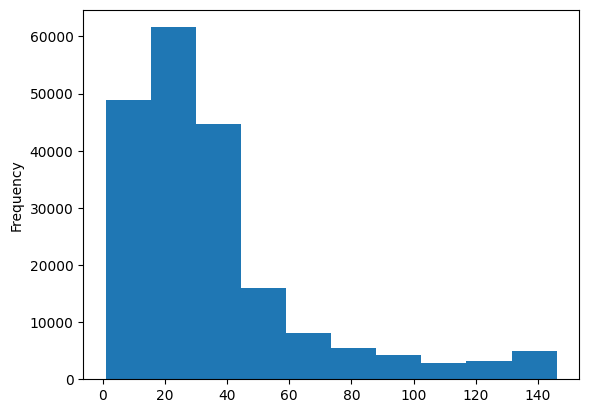

In [159]:
sentence_length.plot.hist()

In [160]:
sentence_length.describe()

count    199992.000000
mean         35.233459
std          29.561006
min           1.000000
25%          16.000000
50%          27.000000
75%          42.000000
max         146.000000
Name: document, dtype: float64

<AxesSubplot: ylabel='Frequency'>

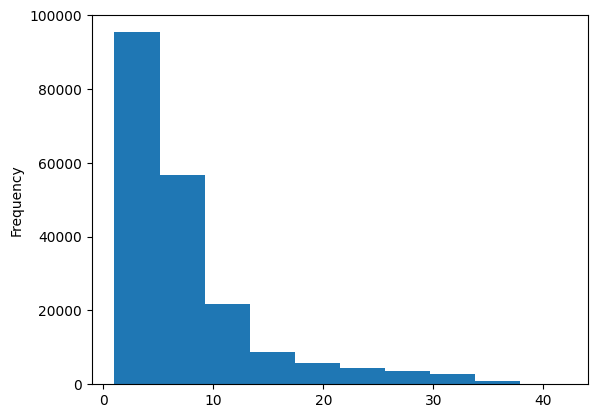

In [168]:
spacing_count.plot.hist()

In [166]:
spacing_count.describe()

count    199992.000000
mean          7.591344
std           6.519023
min           1.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          42.000000
Name: document, dtype: float64

In [163]:
data[sentence_length < 5]

,id,document,label
28,6091784,재밋는뎅,1
56,1651126,최고,0
72,5679106,졸작,0
106,7747745,킬링타임,0
113,7115568,대박,1
...,...,...,...
49847,5766993,진리.,1
49886,7098738,마초남,0
49930,7500092,ㅠ~~ㅠ,0
49934,6929887,굿,1


In [167]:
data[spacing_count <= 2]

,id,document,label
2,10265843,너무재밓었다그래서보는것을추천한다,0
10,9008700,걍인피니트가짱이다.진짜짱이다♥,1
27,5457633,카밀라벨 발연기,0
28,6091784,재밋는뎅,1
45,7719892,평점에속지마시길시간낭비 돈낭비임,0
...,...,...,...
49976,9910608,스토리가..OOO..,0
49978,2306407,amazing,1
49987,333958,개재미있으3,1
49988,7955066,존래 재미없네,0


In [ ]:
# data = data[sentence_length > 10]

In [15]:
data = data[sentence_length > 10]

In [16]:
# 정규 표현식을 활용. 한글, 띄어쓰기만 남기기
# data['document']
import re

data['document'] = data['document'].apply(lambda text: re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '', text))

### 3. 불용어 제거

In [19]:
# data = data[sentence_length > 10]의 불용어 제거
# 시간이 너무 오래 걸림 -> 강사님의 데이터 사용

from tqdm import tqdm
# 불용어 정의
stopwords = ['의', '를', '와', '과', '으로', '것', '잘', '되', '주', '보', '수',
             '좀', '이', '있', '은', '한', '아', '도', '에', '하', '는', '자',
             '하다', '가', '들', '걍', '등']

okt = Okt()
tokenized_data = []
for sentence in tqdm(data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True)
    stopwords_removed_sentences = [token for token in tokenized_sentence if not token in stopwords]
    tokenized_data.append(stopwords_removed_sentences)

  1%|▍                                                                          | 908/178979 [00:28<1:34:43, 31.33it/s]


KeyboardInterrupt: 

In [20]:
# 강사의 데이터를 불러오는 경우

tokenized_data = pd.read_pickle(r'tokenized_data.pkl')

 - vector_size : embedding 된 vector의 차원
 - window : 컨텍스트 window의 크기
 - min_count : 단어의 최소 빈도 수
 - workers : 학습을 위한 프로세스 수
 - sg : 0 (CBOW), 1 (Skip-gram)

In [24]:
from collections.abc import Mapping

In [26]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

ImportError: cannot import name 'Mapping' from 'collections' (C:\Users\GM220808\.pyenv\pyenv-win\versions\3.10.7\lib\collections\__init__.py)

In [203]:
# model을 파일로 저장

model.wv.save_word2vec_format('Word2Vec')

In [205]:
# model을 불러오기

from gensim.models import KeyedVectors

loaded_model = KeyedVectors.load_word2vec_format('Word2Vec')

In [216]:
# 만든 벡터에서 가장 비슷한 벡터들을 출력

print(model.wv.most_similar('오버'))

[('부자연스럽다', 0.7457402944564819), ('톤', 0.7452403903007507), ('어색하다', 0.7442217469215393), ('사투리', 0.6822318434715271), ('분장', 0.6784934997558594), ('맛깔', 0.6758624911308289), ('거슬리다', 0.6625229120254517), ('어색', 0.6621428728103638), ('부자연', 0.660416841506958), ('능청', 0.6573935747146606)]


In [217]:
print(model.wv.most_similar('교도소'))

[('아파트', 0.8677533268928528), ('탄광', 0.863466203212738), ('라붐', 0.8595958948135376), ('캠프', 0.846001386642456), ('바위', 0.8454543948173523), ('마크로스', 0.8375017642974854), ('민주', 0.8364499807357788), ('센터', 0.8360611796379089), ('낙태', 0.83320552110672), ('복판', 0.8329184651374817)]


In [218]:
print(model.wv.most_similar('액션'))

[('스케일', 0.6625667810440063), ('볼거리', 0.6532844305038452), ('코믹', 0.6433947682380676), ('화끈하다', 0.6336246132850647), ('이연걸', 0.6323103904724121), ('액션씬', 0.6315518021583557), ('화려하다', 0.6257326602935791), ('호러', 0.609745979309082), ('무술', 0.6026308536529541), ('격투', 0.5990397930145264)]


In [219]:
print(model.wv.most_similar('민주주의'))

[('민족', 0.8788803219795227), ('노동자', 0.8711350560188293), ('평화', 0.8667857050895691), ('노예', 0.8647013902664185), ('억압', 0.8614408373832703), ('민주화', 0.8609285950660706), ('시민', 0.8597679138183594), ('인권', 0.8579242825508118), ('주민', 0.8567419052124023), ('가해자', 0.8558523654937744)]


### 4. 시각화

In [1]:
!pip uninstall gensim

^C


In [234]:
!pip install gensim==3.6.0

In [235]:
model[model.wv.vocab].shape

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

In [229]:
from sklearn.manifold import TSNE

vocab = list(model.wv.vocab)
X = model[vocab]
USED_VECTOR_COUNT = 200

tsne = TSNE(n_components = 2)
x_tsne = tsne.fit_transform(X[:200, :])       # 200개만 선택해서 차원축소

TypeError: 'dict' object is not callable

In [ ]:
df = pd.DataFrame(X_tsne, index = vocab[:USED_VECTOR_COUNT], columns = ['x', 'y'])
df.head()

In [ ]:
import plotly.express as px
fig = px.scatter(df, x='x', y='y', text = df.index)
fig.update_traces(textposition='top center')
fig.show()

In [ ]:
!python -m gensim.scripts.word2vec2tensor --input Word2Vec --output Word2vecTSV

In [ ]:
# https://projector.tensorflow.org/

In [236]:
import pickle
 
with open('labels.pkl', 'wb') as f: # label
    pickle.dump(data['label'].values, f) 
with open('tokenized_data.pkl', 'wb') as f: # 토큰화가 완료된 리스트
    pickle.dump(tokenized_data, f) 

## used word2vec modeling

### word2vec을 활용한 리뷰 감정 예측 모델

In [253]:
import pandas as pd
from gensim.models import KeyedVectors

# 전처리가 완료된 데이터
tokenized_data = pd.read_pickle(r'tokenized_data.pkl')
label_data = pd.read_pickle(r'labels.pkl')
loaded_model = KeyedVectors.load_word2vec_format('Word2Vec')

In [ ]:
# (1) 하나의 차원으로 통일하는 방법 -> 평균
# (2) padding을 활용.

In [254]:
# sentence는 여러 개의 word로 되어 있기 때문에 하나의 sentence vector를 word vector들의 평균으로 지정함

loaded_model[tokenized_data[0]].mean(axis=0).shape

(100,)

In [262]:
label_data.shape

(178979,)

In [244]:
import numpy as np
np.zeros(100).shape

(100,)

In [260]:
from tqdm import tqdm
import numpy as np

data_vectors = []
embedding_size = 100
for tokened_sentence in tqdm(tokenized_data):
    try:
        seneten_vector = loaded_model[tokened_sentence].mean(axis = 0)
        data_vectors.append(seneten_vector)
    except:
        zeros_vector = np.zeros(embedding_size)
        data_vectors.append(zeros_vector)

100%|███████████████████████████████████████████████████████████████████████| 199992/199992 [00:06<00:00, 32281.04it/s]


In [256]:
vector_data = np.array(data_vectors)

In [257]:
vector_data.shape

(199992, 100)

In [261]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vector_data, label_data, test_size = 0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

ValueError: Found input variables with inconsistent numbers of samples: [199992, 178979]

In [ ]:
from sklearn.linear_model import LogisticRegression    # 분류모델
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

In [ ]:
lr_model.score(X_train, y_train)

In [ ]:
lr_model.score(X_test, y_test)